---

#  mplfinance Date iLoc Transform

---

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd

In [3]:
import mplfinance as mpf
mpf.__version__

'0.12.7a11'

In [4]:
df = pd.read_csv('../data/SP500_NOV2019_Hist.csv',index_col=0,parse_dates=True)

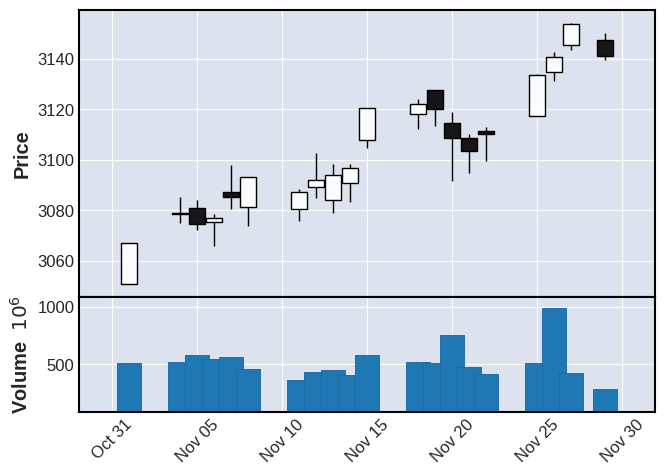

In [5]:
mpf.plot(df,type='candle',show_nontrading=True,volume=True)

### Uses for DateIlocTransform

#### All uses are for `show_nontrading=False` only:

- `.to_date()` &nbsp; location *to* date: &nbsp; for tick label formatting.
- `.to_iloc()` &nbsp; date *to* location: &nbsp; for `xticks` placement.
- `.to_iloc()` &nbsp; date *to* location: &nbsp; for `xlim` placement.
- `.to_iloc()` &nbsp; date *to* location: &nbsp; for `lines` placement.

---

- It seems to me that  
  - **interpolation** may be better using the actual datetime series (rather than the linear formula), whereas 
  - **extrapolation** *will require* the linear formula.
    - Or for "known" cases may be able to use **date calculations**, for example:
      - quartile(0.65) == quartile(0.50) == quartile(0.35) == "known" frequency.
      - intraday with consistent trading hours in data
      - daily with weekends missing (maybe someday allow users to supply holidays)
      - weekly, monthly, yearly, etc. are simple?
  - need to run some tests to see which, if either, is better.
- Keep in mind, while testing, that `xlim` values will affect `xticks` placement.


---

### Experiments

- extrapolation: least squares versus end-to-end linear
  - intraday 1m, 15m, 1h, 3h
  - daily M-F
  - weekly
  
- extrapolation: known frequency formula
  - intraday 1m, 15m, 1h, 3h
  - daily M-F
  - weekly



In [6]:
%ls -l ../data/*.csv

-rw-r--r-- 1 dino dino  33851 Dec 28 18:30 ../data/SP500_20191106_IDayBollinger.csv
-rw-r--r-- 1 dino dino   1097 Sep 22  2020 ../data/SP500_NOV2019_Hist.csv
-rw-r--r-- 1 dino dino  78853 Sep 22  2020 ../data/SP500_NOV2019_IDay.csv
-rw-r--r-- 1 dino dino  92731 Feb 22 12:34 ../data/SP500_NOV2019_IDayRVol.csv
-rw-r--r-- 1 dino dino  35001 Sep 22  2020 ../data/SPY_20110701_20120630_Bollinger.csv
-rwxr-xr-x 1 dino dino  33235 Sep 22  2020 ../data/jpyusd_barchartdotcom.csv*
-rw-r--r-- 1 dino dino 239788 Sep 22  2020 ../data/yahoofinance-AAPL-20040819-20180120.csv
-rw-r--r-- 1 dino dino 250345 Sep 22  2020 ../data/yahoofinance-GOOG-20040819-20180120.csv
-rw-r--r-- 1 dino dino 161639 Sep 22  2020 ../data/yahoofinance-INTC-19950101-20040412.csv
-rw-r--r-- 1 dino dino 189400 Sep 22  2020 ../data/yahoofinance-SPY-20080101-20180101.csv
-rw-r--r-- 1 dino dino   6953 Mar 22 10:49 ../data/yahoofinance-SPY-20200901-20210113.csv


In [7]:
INPUT = ['../data/SP500_NOV2019_Hist.csv',
         '../data/SP500_NOV2019_IDayRVol.csv',
         '../data/SPY_20110701_20120630_Bollinger.csv',
         '../data/yahoofinance-GOOG-20040819-20180120.csv',
        ]

In [8]:
for file in INPUT:
    data = pd.read_csv(file,index_col=0,parse_dates=True)
    data.iloc[[0,1,-1],:].style.set_caption(str(data.shape)+' '+file)
    dts  = data.index.to_series()
    diff = dts.shift(-1) - dts
    for jj in range(9,0,-1):
        q = round(0.1*jj,1)
        print('diff.quantile('+str(q)+')=',diff.quantile(q))

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-01 00:00:00,3050.720000,3066.950000,3050.720000,3066.910000,510301237
2019-11-04 00:00:00,3078.960000,3085.200000,3074.870000,3078.270000,524848878
2019-11-29 00:00:00,3147.180000,3150.300000,3139.340000,3140.980000,286602291


diff.quantile(0.9)= 3 days 00:00:00
diff.quantile(0.8)= 2 days 09:36:00
diff.quantile(0.7)= 1 days 00:00:00
diff.quantile(0.6)= 1 days 00:00:00
diff.quantile(0.5)= 1 days 00:00:00
diff.quantile(0.4)= 1 days 00:00:00
diff.quantile(0.3)= 1 days 00:00:00
diff.quantile(0.2)= 1 days 00:00:00
diff.quantile(0.1)= 1 days 00:00:00


,Open,Close,High,Low,Volume
Date,,,,,
2019-11-05 09:30:00,3080.800000,3080.490000,3081.470000,3080.300000,2209795
2019-11-05 09:31:00,3080.330000,3079.360000,3080.330000,3079.150000,1739410
2019-11-08 15:59:00,3091.160000,3092.910000,3092.910000,3090.960000,1023516


diff.quantile(0.9)= 0 days 00:01:00
diff.quantile(0.8)= 0 days 00:01:00
diff.quantile(0.7)= 0 days 00:01:00
diff.quantile(0.6)= 0 days 00:01:00
diff.quantile(0.5)= 0 days 00:01:00
diff.quantile(0.4)= 0 days 00:01:00
diff.quantile(0.3)= 0 days 00:01:00
diff.quantile(0.2)= 0 days 00:01:00
diff.quantile(0.1)= 0 days 00:01:00


,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2011-07-01 00:00:00,132.089996,134.100006,131.779999,133.919998,117.161659,202385700,132.373927,125.316073,1.219057
2011-07-05 00:00:00,133.779999,134.080002,133.389999,133.809998,117.065437,165936000,133.254297,124.912703,1.066618
2012-06-29 00:00:00,135.199997,136.270004,134.850006,136.100006,121.598610,212250900,136.721010,128.792993,0.921670


diff.quantile(0.9)= 3 days 00:00:00
diff.quantile(0.8)= 3 days 00:00:00
diff.quantile(0.7)= 1 days 00:00:00
diff.quantile(0.6)= 1 days 00:00:00
diff.quantile(0.5)= 1 days 00:00:00
diff.quantile(0.4)= 1 days 00:00:00
diff.quantile(0.3)= 1 days 00:00:00
diff.quantile(0.2)= 1 days 00:00:00
diff.quantile(0.1)= 1 days 00:00:00


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19 00:00:00,49.676899,51.693783,47.669952,49.845802,49.845802,44994500
2004-08-20 00:00:00,50.178635,54.187561,49.925285,53.805050,53.805050,23005800
2018-01-19 00:00:00,1131.829956,1137.859985,1128.300049,1137.510010,1137.510010,1387700


diff.quantile(0.9)= 3 days 00:00:00
diff.quantile(0.8)= 3 days 00:00:00
diff.quantile(0.7)= 1 days 00:00:00
diff.quantile(0.6)= 1 days 00:00:00
diff.quantile(0.5)= 1 days 00:00:00
diff.quantile(0.4)= 1 days 00:00:00
diff.quantile(0.3)= 1 days 00:00:00
diff.quantile(0.2)= 1 days 00:00:00
diff.quantile(0.1)= 1 days 00:00:00


### Here we are going to develop a transform similar to date_to_iloc() with the following features:
- Able to transform both directions
- saves the relavant input data to avoid *some* recalculation
- implementation as a class will enable saving the input data in the transform object.

In [9]:
df = pd.read_csv('../data/SP500_NOV2019_IDayRVol.csv',index_col=0,parse_dates=True)
dtindex = df.index

In [10]:
dtseries = dtindex.to_series()
dtseries['2019-11-08 15:50:01':]

Date
2019-11-08 15:51:00   2019-11-08 15:51:00
2019-11-08 15:52:00   2019-11-08 15:52:00
2019-11-08 15:53:00   2019-11-08 15:53:00
2019-11-08 15:54:00   2019-11-08 15:54:00
2019-11-08 15:55:00   2019-11-08 15:55:00
2019-11-08 15:56:00   2019-11-08 15:56:00
2019-11-08 15:57:00   2019-11-08 15:57:00
2019-11-08 15:58:00   2019-11-08 15:58:00
2019-11-08 15:59:00   2019-11-08 15:59:00
Name: Date, dtype: datetime64[ns]

In [11]:
dtseries.describe(datetime_is_numeric=True)

count                             1563
mean     2019-11-07 00:43:29.596929024
min                2019-11-05 09:30:00
25%                2019-11-06 00:45:00
50%                2019-11-06 16:00:00
75%                2019-11-07 15:59:30
max                2019-11-08 15:59:00
Name: Date, dtype: object

In [12]:
diff = dtseries.shift(-1) - dtseries

In [13]:
diff.describe()

count                         1562
mean     0 days 00:03:00.883482714
std      0 days 00:45:56.566393842
min                0 days 00:01:00
25%                0 days 00:01:00
50%                0 days 00:01:00
75%                0 days 00:01:00
max                0 days 17:30:00
Name: Date, dtype: object

In [14]:
diff.quantile(0.9981)

Timedelta('0 days 00:36:46.254000005')

In [15]:
import pandas as pd
import numpy  as np
import matplotlib.dates as mdates
from mplfinance._utils import _date_to_mdate
    
class DateIlocTransform:
    '''Create a transform object that can transform from a date to a DatetimeIndex location, and vis versa.
    Requires a Pandas DatetimeIndex upon creation
    If `date` does not exactly match a date in the series then interpolate between two dates.
    If `date` is outside the range of dates in the series, then extrapolate.
    '''
    
    def __init__(self,dtindex):
        if not isinstance(dtindex,pd.DatetimeIndex):
            raise TypeError('Need `pandas.DatetimeIndex`, but got "'+str(type(dtindex))+'"')
        if not len(dtindex) > 1:
            raise ValueError('`dtindex` must have length of at least 2.')
        self._dtindex  = dtindex
        self._dtseries = dtindex.to_series()
        self._lsslope, self._lsyicpt = self._lsq_linear(self._dtseries)
        self._epslope, self._epyicpt = self._ep_linear(self._dtseries)
        

    def _lsq_linear(self,dtseries):
        '''
        Calculate `y = mx + b` linear relationship between `date` and
        `iloc` in `dtseries`.  Return slope (m) and y_intercept (b).
        This closed-form linear least squares algorithm was taken from
        https://mmas.github.io/least-squares-fitting-numpy-scipy
        '''
        si = dtseries
        s  = si.dropna() 
        if len(s) < 2:
            err = 'NOT enough data for Least Squares'
            if (len(si) > 2):
                err += ', due to presence of NaNs'
            raise ValueError(err)
        xs = mdates.date2num(s.index.to_pydatetime())
        ys = [y for y in range(len(xs))]
        a  = np.vstack([xs, np.ones(len(xs))]).T
        m, b  = np.dot(np.linalg.inv(np.dot(a.T,a)), np.dot(a.T,ys))
        #x1, x2 = xs[0], xs[-1]
        #y1 = m*x1 + b
        #y2 = m*x2 + b
        #x1, x2 = mdates.num2date(x1), mdates.num2date(x2)
        #return ((x1,y1),(x2,y2))
        return m, b
    
    def _ep_linear(self,dtseries):
        d1 = _date_to_mdate(dtseries.index[0])
        d2 = _date_to_mdate(dtseries.index[-1])

        i1 = 0.0
        i2 = len(dtseries) - 1.0

        slope   = (i2 - i1) / (d2 - d1)
        yitrcpt1 = i1 - (slope*d1)
        yitrcpt2 = i2 - (slope*d2)
        if yitrcpt1 != yitrcpt2:
            print('WARNING: yintercepts NOT equal!!!(',yitrcpt1,yitrcpt2,')')
            yitrcpt = (yitrcpt1 + yitrcpt2) / 2.0
        else:
            yitrcpt = yitrcpt1 
        return slope, yitrcpt
    
    def to_iloc(self,date,method='ls'):
        if method == 'ls':   # Least Squares linear
            return self._lsslope*mdates.date2num(date) + self._lsyicpt
        elif method == 'ep': # End Point linear
            return self._epslope*mdates.date2num(date) + self._epyicpt
        elif method == 'in': # INterpolate
            d1s = self._dtseries.loc[date:]
            d1  = d1s[ 0] if len(d1s) > 0 else self._dtseries.iloc[-1]
            d2s = self._dtseries.loc[:date]
            d2  = d2s[-1] if len(d2s) > 0 else self._dtseries.iloc[ 0]
            print('\nd1,d2=',d1.date().day,d2.date().day,' intloc,iloc=',intloc,iloc)
# TODO: Finish Up this CODE BLOCK:
            # If there are duplicate dates in the series, for example in a renko plot
            # then .get_loc(date) will return a slice containing all the dups, so:
            loc1 = dtseries.index.get_loc(d1)
            if isinstance(loc1,slice): loc1 = loc1.start
            loc2 = dtseries.index.get_loc(d2)
            if isinstance(loc2,slice): loc2 = loc2.stop - 1
            return (loc1+loc2)/2.0
        else:
            raise ValueError('Bad value for `method`: ('+str(method)+') ')
        return loc2
    
    def to_datetime(self,iloc,method='ls'):
        '''
        y = mx + b    
        x = (y-b)/m
        '''
        if method == 'ls':    # Least Squares linear
            d = (iloc - self._lsyicpt)/self._lsslope
            return mdates.num2date(d).replace(tzinfo=None)
        elif method == 'ep':  # End Point linear
            d = (iloc - self._epyicpt)/self._epslope
            return mdates.num2date(d).replace(tzinfo=None)
        elif method == 'in': # INterpolate
            intloc = int(np.round(iloc))
            d1s = self._dtseries.iloc[intloc:]
            d1  = d1s[ 0] if len(d1s) > 0 else self._dtseries.iloc[-1]
            d2s = self._dtseries.iloc[:intloc]
            d2  = d2s[-1] if len(d2s) > 0 else self._dtseries.iloc[ 0]
            print('\nd1,d2=',d1.date().day,d2.date().day,' intloc,iloc=',intloc,iloc)
            return d2
        else:
            raise ValueError('Bad value for `method`: ('+str(method)+') ')

In [16]:
df = pd.read_csv('../data/SP500_NOV2019_Hist.csv',index_col=0,parse_dates=True)

In [17]:
dit = DateIlocTransform(df.index)

In [18]:
for method in ['ep','ls']:
    print('\n=== method: "'+method+'"  =====')
    for d in df.index.to_pydatetime():
        il = dit.to_iloc(d,method=method)
        dt = dit.to_datetime(il,method=method)
        err = 'ERR' if d.date().day != dt.date().day else ''
        print("%6.2f  %2d  %2d  %3s" % (il,d.date().day,dt.date().day,err))


=== method: "ep"  =====
  0.00   1   1     
  2.04   4   4     
  2.71   5   5     
  3.39   6   6     
  4.07   7   7     
  4.75   8   8     
  6.79  11  11     
  7.46  12  12     
  8.14  13  13     
  8.82  14  14     
  9.50  15  15     
 11.54  18  18     
 12.21  19  19     
 12.89  20  20     
 13.57  21  21     
 14.25  22  22     
 16.29  25  25     
 16.96  26  26     
 17.64  27  27     
 19.00  29  29     

=== method: "ls"  =====
 -0.46   1   1     
  1.65   4   4     
  2.36   5   5     
  3.06   6   6     
  3.77   7   7     
  4.47   8   8     
  6.58  11  11     
  7.28  12  12     
  7.99  13  13     
  8.69  14  14     
  9.39  15  15     
 11.51  18  18     
 12.21  19  19     
 12.91  20  20     
 13.62  21  21     
 14.32  22  22     
 16.43  25  25     
 17.13  26  26     
 17.84  27  27     
 19.25  29  29     


In [19]:
dtseries = df.index.to_series()

In [20]:
dtseries.iloc[2:][0]
dtseries.iloc[:2][-1]

Timestamp('2019-11-05 00:00:00')

Timestamp('2019-11-04 00:00:00')

In [21]:
dtseries[0:3]

Date
2019-11-01   2019-11-01
2019-11-04   2019-11-04
2019-11-05   2019-11-05
Name: Date, dtype: datetime64[ns]

In [22]:
df.index[0:3]

DatetimeIndex(['2019-11-01', '2019-11-04', '2019-11-05'], dtype='datetime64[ns]', name='Date', freq=None)

In [23]:
for d in df.index.to_pydatetime():
    il = dit.to_iloc(d,method='ls')
    dt = dit.to_datetime(il,method='ils')
    err = 'ERR' if d.date().day != dt.date().day else ''
    print("%6.2f  %2d  %2d  %3s" % (il,d.date().day,dt.date().day,err))

ValueError: Bad value for `method`: (ils) 

In [ ]:
STOP

In [ ]:
lm, lb = dit._lsq_linear(dtseries)
lm, lb

In [ ]:
em, eb = dit._ep_linear(dtseries)
em, eb

In [ ]:
for jj in range(len(dtseries)):
    date = dtseries.iloc[jj]
    
    ly  = lm*mdates.date2num(date) + lb
    ily = int(np.round(ly))
    
    ey  = em*mdates.date2num(date) + eb
    iey = int(np.round(ey))
    
    print("%2d  %5.2f  %2d  %5.2f %20s" % (ily,ly,iey,ey,date))

In [ ]:
alldts = [dtseries[0] + pd.DateOffset(offset) for offset in range(30)]
new_dtseries = pd.Series(alldts,index=pd.DatetimeIndex(alldts))

In [ ]:
eerr = []
lerr = []
print("jj ily  iey   ly     ey     dt  dt(il) dt(ie)")
for jj in range(len(new_dtseries)-1):
    date = new_dtseries.iloc[jj]
    
    ly  = lm*mdates.date2num(date) + lb
    ily = int(np.round(ly))
    
    ey  = em*mdates.date2num(date) + eb
    iey = int(np.round(ey))
    
    ily = 0 if (ily < 0 or ily > 19) else ily
    iey = 0 if (iey < 0 or iey > 19) else iey
    
    err_l = dtseries.iloc[ily].date().day - date.date().day
    err_e = dtseries.iloc[iey].date().day - date.date().day
    lerr.append(abs(err_l))
    eerr.append(abs(err_e))

    print("%2d  %2d  %2d  %5.2f  %5.2f  %4s  %4s  %4s  %4s  %4s" % 
          (jj,ily,iey,ly,ey,date.date().day,dtseries.iloc[ily].date().day,
           dtseries.iloc[iey].date().day, err_l, err_e)
         )

print('\nsum(lerr)=',sum(lerr),' sum(eerr)=',sum(eerr))

In [ ]:
lerr = []
eerr = []
for jj in range(len(dtseries)):
    date = dtseries.iloc[jj]
    
    ly  = lm*mdates.date2num(date) + lb
    ily = int(np.round(ly))
    
    ey  = em*mdates.date2num(date) + eb
    iey = int(np.round(ey))
    
    err_l = dtseries.iloc[ily].date().day - date.date().day
    err_e = dtseries.iloc[iey].date().day - date.date().day
    
    lerr.append(abs(err_l))
    eerr.append(abs(err_e))

    
    print("%2d  %5.2f  %2d  %5.2f %6s %6s %6s %6s %6s" % (ily,ly,iey,ey,date.date().day,
                                                  dtseries.iloc[ily].date().day,
                                                  dtseries.iloc[iey].date().day,
                                                  err_l, err_e))
    
print('\nsum(lerr)=',sum(lerr),' sum(eerr)=',sum(eerr))